In [2]:
a = torch.Tensor(5,3)
a = torch.rand(5,3)
print(a)
b = torch.rand(3,4)
print(b)
print(a*b)

 0,3495  0,6793  0,5830
 0,0566  0,1540  0,8538
 0,5578  0,3272  0,7556
 0,8243  0,1743  0,7137
 0,2077  0,0563  0,4037
[torch.DoubleTensor of size 5x3]

 0,1507  0,6136  0,9058  0,4814
 0,8861  0,4037  0,7192  0,0512
 0,7810  0,6285  0,8220  0,3151
[torch.DoubleTensor of size 3x4]



 1,1100  0,8551  1,2844  0,3867
 0,8119  0,6335  0,8639  0,3042
 0,9642  0,9492  1,3618  0,5234
 0,8361  1,0246  1,4587  0,6306
 0,3965  0,4039  0,5605  0,2301
[torch.DoubleTensor of size 5x4]



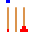

Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.SpatialMaxPooling(2,2,2,2)
  (3): nn.SpatialConvolution(6 -> 16, 5x5)
  (4): nn.SpatialMaxPooling(2,2,2,2)
  (5): nn.View
  (6): nn.Linear(400 -> 120)
  (7): nn.Linear(120 -> 84)
  (8): nn.Linear(84 -> 4)
  (9): nn.LogSoftMax
}	


-------------	
-1,2564
-1,3160
-1,5141
-1,4822
[torch.DoubleTensor of size 4]




  1
 32
 32
[torch.LongStorage of size 3]



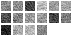

In [27]:
require 'nn'
require 'torch'
img = image.load('52.png'):float()
img = img[{{1,3}}]
itorch.image(img)

input = torch.rand(1,32,32) 
net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.Linear(120, 84))
net:add(nn.Linear(84, 4))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet5\n' .. net:__tostring());
output = net:forward(input)
print("-------------")
print(output)
net:zeroGradParameters()
gradInput = net:backward(input, torch.rand(10))
print(#gradInput)

for i = 1,4 do
    itorch.image(net:get(i).output)
end